# 1. Import một số thư viện cần thiết

In [1]:
import numpy.polynomial.polynomial as poly
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm

from datetime import datetime
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.utils import column_or_1d

In [2]:
VNM = pd.read_csv("VNM.csv")

In [3]:
VNM

,Date,Price,Open,High,Low,Vol.,Change %
0,3/1/2019,110654.0,112611.0,112611.0,110654.0,1.04M,0.21%
1,3/4/2019,111828.0,110732.0,112611.0,110732.0,1.05M,1.06%
2,3/5/2019,111124.0,111515.0,111750.0,110811.0,639.01K,-0.63%
3,3/6/2019,110341.0,111124.0,111750.0,108385.0,853.50K,-0.70%
4,3/7/2019,109324.0,110576.0,111124.0,109167.0,849.60K,-0.92%
...,...,...,...,...,...,...,...
1263,3/19/2024,67800.0,68500.0,68500.0,67800.0,3.16M,-0.15%
1264,3/20/2024,68000.0,67800.0,68600.0,67500.0,3.55M,0.29%
1265,3/21/2024,68400.0,68200.0,68500.0,67900.0,4.91M,0.59%
1266,3/22/2024,67800.0,69300.0,72500.0,67800.0,6.07M,-0.88%


# 2. Tiền xử lý dữ liệu

### Loại bỏ một số dữ liệu trống trong dataset

In [4]:
# Drop missing values
VNM = VNM.dropna()
# Reset the index
VNM = VNM.reset_index(drop=True)

### Chuyển dữ liệu cột Price sang dạng float

In [5]:
VNM["Price"]=VNM["Price"].astype(float)

# 3. Trực quan hóa tập dữ liệu ban đầu bằng biểu đồ

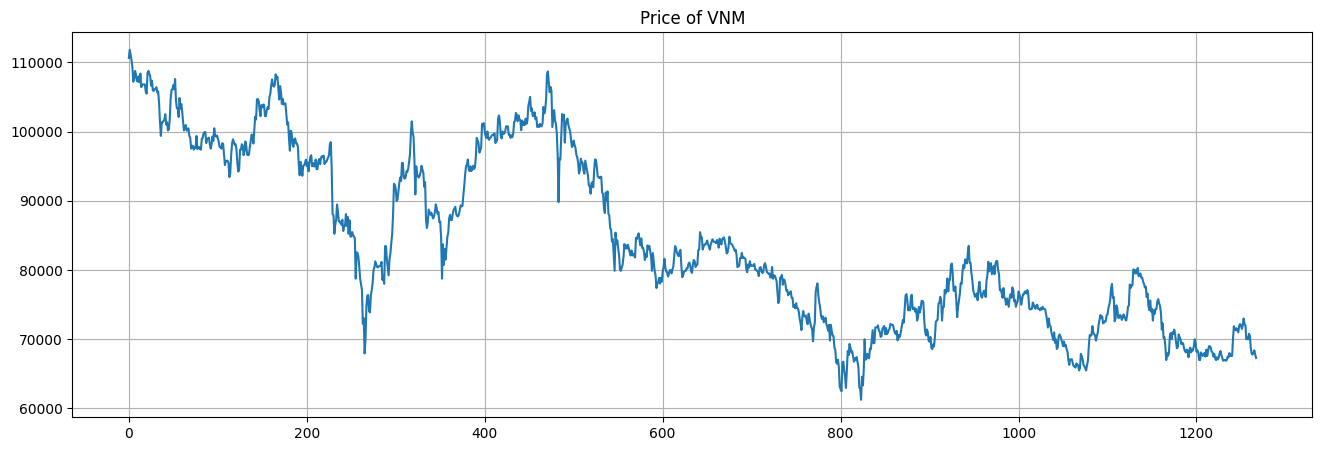

In [6]:
# Illustrated representation of Close Stock Price
plt.figure(figsize=(16,5))
plt.plot(VNM["Price"])
plt.title('Price of VNM')
plt.grid(True)
plt.show()

# 4. Chia tập dữ liệu để train-test-validate theo tỉ lệ 7:2:1

In [7]:
# Split the data into training, testing, and validation sets
train_size = int(0.7 * len(VNM))
test_size = int(0.2 * len(VNM))
val_size = len(VNM) - train_size - test_size

In [8]:
train_data = VNM[:train_size]
test_data = VNM[train_size:train_size+test_size]
val_data = VNM[train_size+test_size:]

<h1> Quá trình training

In [9]:
#Training data
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Price'])

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

<h1> Quá trình testing

In [10]:
# Testing data
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Price'])
y_pred = model.predict(x_test)

<h1>Quá trình validate

In [11]:
#Validate data
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Price'])
y_pred_val =  model.predict(x_val)

<h1>Quá trình dự đoán giá cổ phiếu trong 30 ngày tiếp theo

In [12]:
#Tạo index cho 30 ngày tiếp theo
last_index =  VNM.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

#Tạo một mảng gồm 30 số nguyên liên tiếp bắt đầu từ last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

#Dự đoán giá đóng cửa của cổ phiếu trong 30 ngày tiếp theo
y_next_30_days = model.predict(x_next_30_days)

print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[58612.49861183 58576.00665046 58539.51468909 58503.02272772
 58466.53076635 58430.03880498 58393.54684361 58357.05488224
 58320.56292087 58284.0709595  58247.57899813 58211.08703677
 58174.5950754  58138.10311403 58101.61115266 58065.11919129
 58028.62722992 57992.13526855 57955.64330718 57919.15134581
 57882.65938444 57846.16742307 57809.6754617  57773.18350033
 57736.69153896 57700.19957759 57663.70761622 57627.21565485
 57590.72369348 57554.23173211]


<h1>Đánh giá độ chính xác của thuật toán

In [13]:
#RMSE
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)

Validation RMSE: 9400.550099289025
Testing RMSE: 7715.850350478319


In [14]:
#MAE
valid_mae = mean_absolute_error(y_val,y_pred_val)
test_mae = mean_absolute_error(y_test, y_pred)
print('Validation MAE:', valid_mae)
print('Testing MAE:', test_mae)

Validation MAE: 9085.332379823292
Testing MAE: 6647.426194101749


In [15]:
#MAPE
valid_mape = np.mean(np.abs((y_val - y_pred_val) / y_val))*100
test_mape = np.mean(np.abs((y_test - y_pred) / y_test))*100
print('Validation MAPE:', valid_mape)
print('Testing MAPE:', test_mape)

Validation MAPE: 12.87176473978201
Testing MAPE: 8.728602916194719


<h1>Vẽ hình mô tả dự đoán

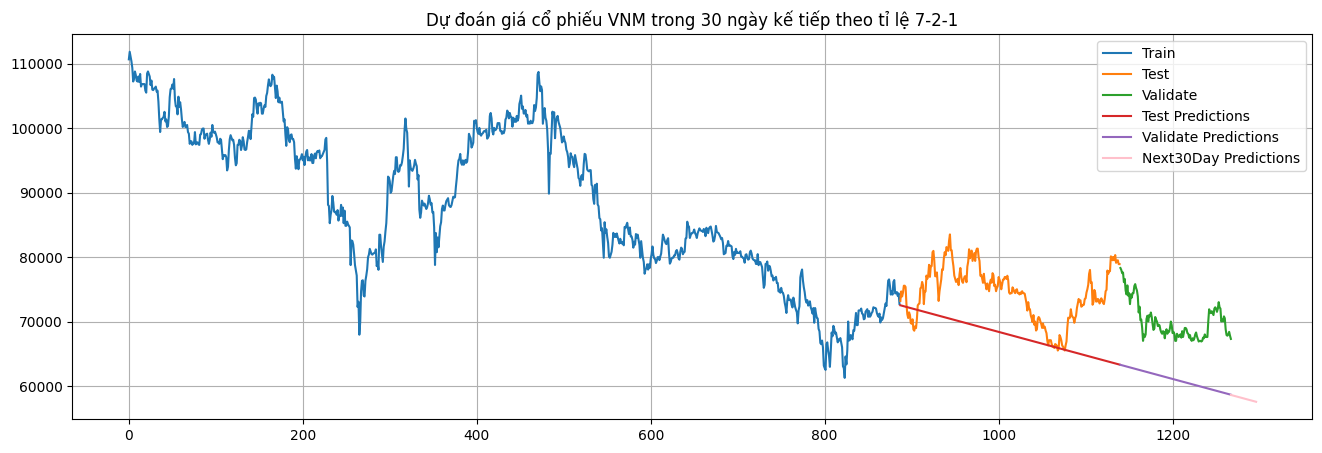

In [16]:
#Drawing plot
plt.figure(figsize=(16,5))
plt.title("Dự đoán giá cổ phiếu VNM trong 30 ngày kế tiếp theo tỉ lệ 7-2-1")
plt.grid(True)
plt.plot(train_data.index, train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
plt.plot(val_data.index, val_data['Price'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, y_pred_val)
plt.plot(last_data,y_next_30_days, color ="pink")
plt.legend(['Train', 'Test', 'Validate','Test Predictions','Validate Predictions','Next30Day Predictions'])
plt.show()

# 5. Chia tập dữ liệu để train-test-validate theo tỉ lệ 6:3:1

In [17]:
# Split the data into training, testing, and validation sets
train_size = int(0.6 * len(VNM))
test_size = int(0.3 * len(VNM))
val_size = len(VNM) - train_size - test_size

In [18]:
train_data = VNM[:train_size]
test_data = VNM[train_size:train_size+test_size]
val_data = VNM[train_size+test_size:]

<h1>Quá trình training

In [19]:
#Training data
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Price'])

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

<h1>Quá trình testing

In [20]:
# Testing data
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Price'])
y_pred = model.predict(x_test)

<h1>Quá trình validate

In [21]:
#Validate data
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Price'])
y_pred_val =  model.predict(x_val)

<h1>Quá trình dự đoán giá cổ phiếu trong 30 ngày tiếp theo

In [22]:
#Tạo index cho 30 ngày tiếp theo
last_index =  VNM.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

#Tạo một mảng gồm 30 số nguyên liên tiếp bắt đầu từ last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

#Dự đoán giá đóng cửa của cổ phiếu trong 30 ngày tiếp theo
y_next_30_days = model.predict(x_next_30_days)

print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[65108.58154933 65078.57945529 65048.57736125 65018.57526721
 64988.57317316 64958.57107912 64928.56898508 64898.56689104
 64868.564797   64838.56270296 64808.56060891 64778.55851487
 64748.55642083 64718.55432679 64688.55223275 64658.55013871
 64628.54804466 64598.54595062 64568.54385658 64538.54176254
 64508.5396685  64478.53757446 64448.53548042 64418.53338637
 64388.53129233 64358.52919829 64328.52710425 64298.52501021
 64268.52291617 64238.52082212]


<h1>Đánh giá độ chính xác của thuật toán

In [23]:
#RMSE
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)

Validation RMSE: 3872.0822927827526
Testing RMSE: 6246.932945924459


In [24]:
#MAE
valid_mae = mean_absolute_error(y_val,y_pred_val)
test_mae = mean_absolute_error(y_test, y_pred)
print('Validation MAE:', valid_mae)
print('Testing MAE:', test_mae)

Validation MAE: 3039.1168853419404
Testing MAE: 5097.519298947355


In [25]:
#MAPE
valid_mape = np.mean(np.abs((y_val - y_pred_val) / y_val))*100
test_mape = np.mean(np.abs((y_test - y_pred) / y_test))*100
print('Validation MAPE:', valid_mape)
print('Testing MAPE:', test_mape)

Validation MAPE: 4.2221130968434455
Testing MAPE: 7.127674334599707


<h1>Vẽ hình mô tả dự đoán

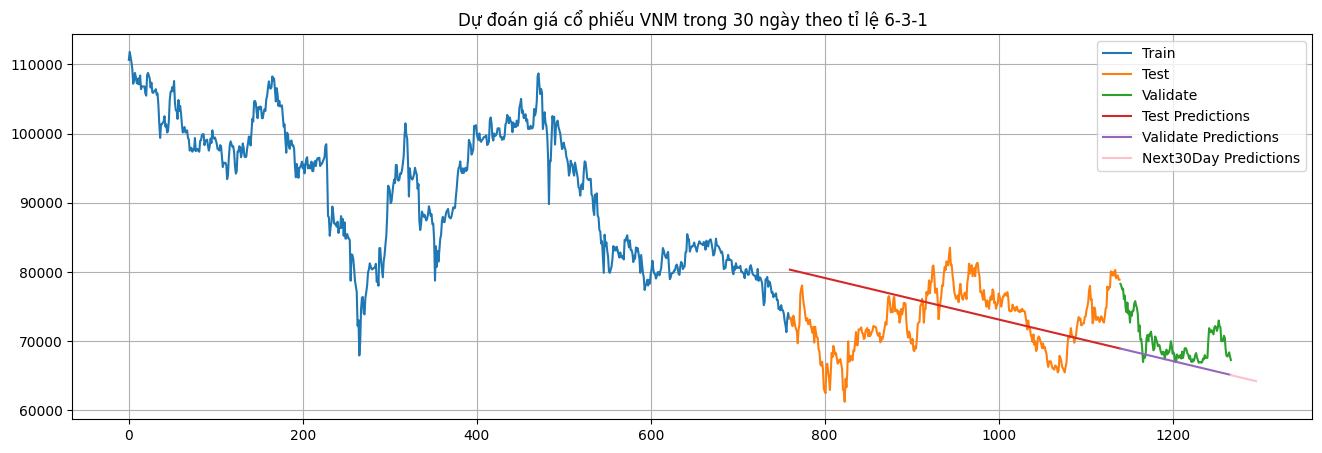

In [26]:
#Drawing plot
plt.figure(figsize=(16,5))
plt.grid(True)
plt.title("Dự đoán giá cổ phiếu VNM trong 30 ngày theo tỉ lệ 6-3-1")
plt.plot(train_data.index, train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
plt.plot(val_data.index, val_data['Price'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, y_pred_val)
plt.plot(last_data,y_next_30_days, color="pink")
plt.legend(['Train', 'Test','Validate', 'Test Predictions','Validate Predictions','Next30Day Predictions'])
plt.show()

# 6. Chia tập dữ liệu để train-test-validate theo tỉ lệ 5:3:2

In [27]:
# Split the data into training, testing, and validation sets
train_size = int(0.5 * len(VNM))
test_size = int(0.3 * len(VNM))
val_size = len(VNM) - train_size - test_size

In [28]:
train_data = VNM[:train_size]
test_data = VNM[train_size:train_size+test_size]
val_data = VNM[train_size+test_size:]

<h1> Quá trình training

In [29]:
#Training data
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Price'])

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

<h1> Quá trình testing

In [30]:
# Testing data
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Price'])
y_pred = model.predict(x_test)

<h1>Quá trình validate

In [31]:
#Validate data
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Price'])
y_pred_val =  model.predict(x_val)

<h1>Quá trình dự đoán giá cổ phiếu trong 30 ngày tiếp theo

In [32]:
#Tạo index cho 30 ngày tiếp theo
last_index =  VNM.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

#Tạo một mảng gồm 30 số nguyên liên tiếp bắt đầu từ last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

#Dự đoán giá đóng cửa của cổ phiếu trong 30 ngày tiếp theo
y_next_30_days = model.predict(x_next_30_days)

print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[69765.18709335 69739.69666004 69714.20622673 69688.71579342
 69663.22536012 69637.73492681 69612.2444935  69586.7540602
 69561.26362689 69535.77319358 69510.28276028 69484.79232697
 69459.30189366 69433.81146036 69408.32102705 69382.83059374
 69357.34016044 69331.84972713 69306.35929382 69280.86886051
 69255.37842721 69229.8879939  69204.39756059 69178.90712729
 69153.41669398 69127.92626067 69102.43582737 69076.94539406
 69051.45496075 69025.96452745]


<h1>Đánh giá độ chính xác của thuật toán

In [33]:
#RMSE
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)

Validation RMSE: 4047.7638273746506
Testing RMSE: 7379.900421178019


In [34]:
#MAE
valid_mae = mean_absolute_error(y_val,y_pred_val)
test_mae = mean_absolute_error(y_test, y_pred)
print('Validation MAE:', valid_mae)
print('Testing MAE:', test_mae)

Validation MAE: 3329.0158762818423
Testing MAE: 5773.861322690621


In [35]:
#MAPE
valid_mape = np.mean(np.abs((y_val - y_pred_val) / y_val))*100
test_mape = np.mean(np.abs((y_test - y_pred) / y_test))*100
print('Validation MAPE:', valid_mape)
print('Testing MAPE:', test_mape)

Validation MAPE: 4.7442546601537074
Testing MAPE: 8.041002757879061


<h1>Vẽ hình mô tả dự đoán

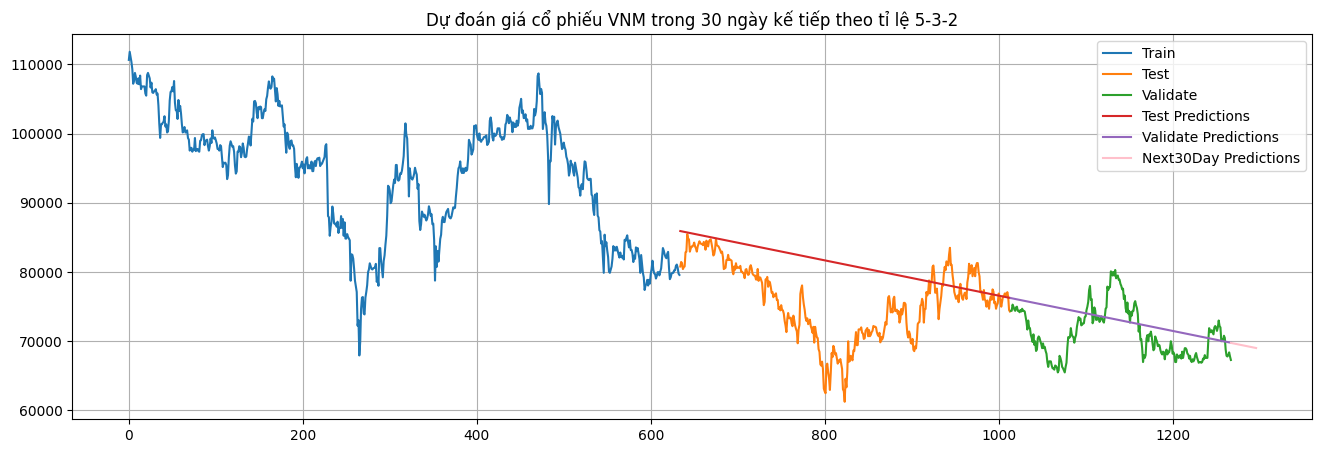

In [36]:
#Drawing plot
plt.figure(figsize=(16,5))
plt.title("Dự đoán giá cổ phiếu VNM trong 30 ngày kế tiếp theo tỉ lệ 5-3-2")
plt.grid(True)
plt.plot(train_data.index, train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
plt.plot(val_data.index, val_data['Price'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, y_pred_val)
plt.plot(last_data,y_next_30_days, color ="pink")
plt.legend(['Train', 'Test', 'Validate','Test Predictions','Validate Predictions','Next30Day Predictions'])
plt.show()